In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('data_flatten.xlsx', header=None).values.reshape(-1)
y = data

In [4]:
n = len(data)
alpha = 0.32
y_hat = np.zeros(n)
s1 = np.zeros(n)
s2 = np.zeros(n)

In [5]:
s1[0] = y[0]
s2[0] = y[0]
for i in range(1, n):
    s1[i] = alpha * y[i] + (1 - alpha) * s1[i - 1]
    s2[i] = alpha * s1[i] + (1 - alpha) * s2[i - 1]
    y_hat[i] = 2 * s1[i - 1] - s2[i - 1] + alpha / (1 - alpha) * (s1[i - 1] - s2[i - 1])
at = 2 * s1[-1] - s2[-1]
bt = alpha / (1 - alpha) * (s1[-1] - s2[-1])
m = np.arange(1, 9)
y_hat2 = at + bt * m

print(y_hat2)

[101.5122302  102.07155082 102.63087145 103.19019207 103.7495127
 104.30883332 104.86815394 105.42747457]


In [6]:
y_hat2 = np.round(y_hat2)
y_hat2

array([102., 102., 103., 103., 104., 104., 105., 105.])

In [7]:
len(y[1:])

103

In [8]:
at, bt

(100.9529095732594, 0.5593206243781277)

In [9]:
mse = (1 / n) * np.sum((y_hat[1:] - y[1:]) ** 2)
mse

52.96015793448224

In [10]:
def mse(y: np.ndarray, alpha: float) -> float:
    s1[0] = y[0]
    s2[0] = y[0]
    for i in range(1, n):
        s1[i] = alpha * y[i] + (1 - alpha) * s1[i - 1]
        s2[i] = alpha * s1[i] + (1 - alpha) * s2[i - 1]
        y_hat[i] = 2 * s1[i - 1] - s2[i - 1] + alpha / (1 - alpha) * (s1[i - 1] - s2[i - 1])

    mse = (1 / n) * np.sum((y_hat[1:] - y[1:]) ** 2)
    return mse

In [23]:
[mse(y, a) for a in np.arange(0.26, 0.36, 0.01)]

[54.632890495823546,
 54.11138162177053,
 53.697945781441284,
 53.38372584522764,
 53.160713357054036,
 53.02168900809138,
 52.960157934482275,
 52.9702838904335,
 53.04682498989388,
 53.185072709034515]

In [12]:
y_hat[-1], y_hat2[0], 2 * s1[-1] - s2[-1] + alpha / (1 - alpha) * (s1[-1] - s2[-1])

(98.58690264618832, 102.0, 101.05255731098075)

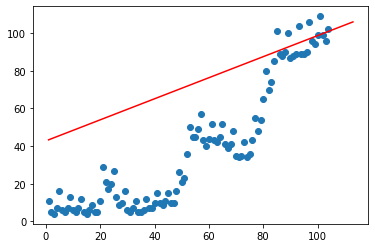

In [13]:
plt.scatter(np.arange(1, 105), y)
x = np.array([1, 113])
plt.plot(x, at + bt * (x - 104), color='r')
plt.savefig('prediction')

In [14]:
at, bt

(100.9529095732594, 0.5593206243781277)

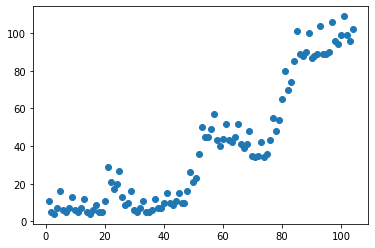

In [15]:
plt.scatter(np.arange(1, 105), y)
plt.savefig('scatter')